###### From: https://www.google.com/search?q=how+to+find+candlestick+patterns+in+data+using+python&rlz=1C1VDKB_enUS947US947&oq=how+to+find+candlestick+patterns+in+data+using+python&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigATIHCAUQIRigATIHCAYQIRirAjIHCAcQIRifBTIHCAgQIRifBdIBCzEwMTQ1NGowajE1qAIIsAIB&sourceid=chrome&ie=UTF-8

## Candlestick Patterns
https://www.tastyfx.com/news/16-candlestick-patterns-every-trader-should-know-180615/


## TA-Lib - Technical Analysis Library
https://ta-lib.org/

## Environment: talib_env

In [1]:
import pandas as pd
import talib
import mplfinance as mpf
import pprint
import numpy as np

In [2]:
# Assuming your data is in a CSV file with columns 'Open', 'High', 'Low', 'Close'
data = pd.read_csv("data/SPDR S&P 500 ETF Trust Units_SPY_HistoricalData_20240830A.csv") 

In [3]:
data.rename(columns = {'Close/Last': 'Close'}, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume
0,8/29/2024,560.31,563.68,557.18,558.35,38715180
1,8/28/2024,561.21,561.65,555.04,558.30,41066020
2,8/27/2024,559.49,562.06,558.32,561.56,32693900
3,8/26/2024,563.18,563.91,559.05,560.79,35788610
4,8/23/2024,559.53,563.09,557.29,562.13,50639390


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by = 'Date', inplace = True)
data = data.reset_index()
data.drop('index', axis=1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-02,200.97,200.995,199.86,200.6100,71399620
1,2014-09-03,201.38,201.410,200.22,200.5000,57371000
2,2014-09-04,200.84,201.580,199.66,200.2101,84993660
3,2014-09-05,200.17,201.190,199.41,201.1100,102010300
4,2014-09-08,200.92,201.210,200.00,200.5900,64103050


## Engulfing

In [5]:
# Detect a bullish engulfing pattern
data['engulfing'] = talib.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the engulfing pattern occurred
engulfing_dates = data[data['engulfing'] == 100].index

data[data['engulfing'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing
3,2014-09-05,200.17,201.1900,199.41,201.11,102010300,100
10,2014-09-16,198.61,200.8400,198.50,200.48,116039000,100
42,2014-10-30,197.58,199.9500,197.40,199.38,112825200,100
57,2014-11-20,204.26,205.7100,204.18,205.58,72498660,100
97,2015-01-21,201.50,203.6600,200.94,203.08,122729500,100
...,...,...,...,...,...,...,...
2284,2023-09-28,425.48,430.2499,424.87,428.52,92258310,100
2319,2023-11-16,449.22,450.5600,448.12,450.23,66665800,100
2326,2023-11-28,454.08,456.2700,453.50,454.93,62115010,100
2402,2024-03-19,512.15,515.9950,511.12,515.71,60755260,100


In [6]:
# Get the index values
engulfing_index_values = np.where(data['engulfing'] == 100)[0].tolist()

print(engulfing_index_values)

[3, 10, 42, 57, 97, 147, 181, 240, 305, 359, 395, 398, 409, 416, 423, 464, 514, 522, 595, 621, 804, 949, 975, 979, 981, 987, 1014, 1145, 1166, 1220, 1245, 1297, 1307, 1352, 1369, 1406, 1474, 1480, 1482, 1595, 1603, 1624, 1630, 1646, 1670, 1719, 1749, 1816, 1873, 1914, 1918, 1952, 1955, 2009, 2018, 2044, 2050, 2055, 2104, 2139, 2155, 2164, 2170, 2216, 2227, 2232, 2284, 2319, 2326, 2402, 2474]


# target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\2411880134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engulfing_df['Date'] = pd.to_datetime(engulfing_df['Date'])  # Ensure the column is in datetime format


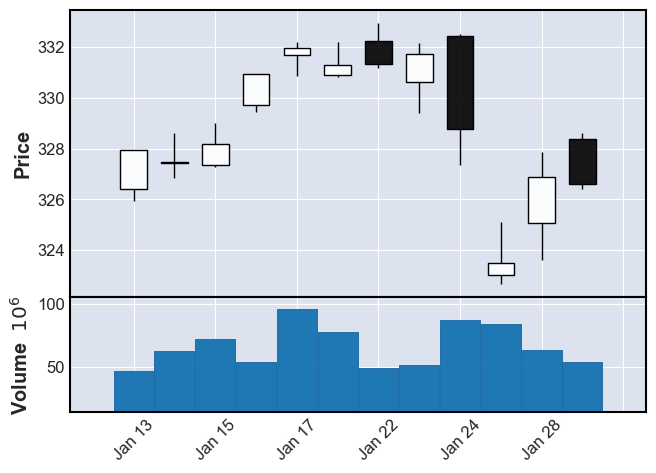

In [8]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
engulfing_df = data.iloc[low_value:high_value]

engulfing_df['Date'] = pd.to_datetime(engulfing_df['Date'])  # Ensure the column is in datetime format
engulfing_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(engulfing_df, type='candle', volume=True)

## Hammer

In [9]:
# Detect a hammer pattern
data['hammer'] = talib.CDLHAMMER(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the hammer pattern occurred
hammer_dates = data[data['hammer'] == 100].index

data[data['hammer'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer
100,2015-01-26,204.71,205.5600,203.8500,205.4500,91684840,0,100
126,2015-03-04,210.40,210.4900,209.0600,210.2301,114257600,0,100
146,2015-04-01,206.39,206.4200,204.5100,205.7000,137055500,0,100
164,2015-04-28,210.74,211.5000,209.3301,211.4400,86758030,0,100
231,2015-08-03,210.46,210.5300,208.6500,209.7900,113432300,0,100
235,2015-08-07,208.16,208.3400,206.8700,207.9500,117703500,0,100
324,2015-12-14,202.07,203.0500,199.9500,202.9008,181638100,0,100
333,2015-12-28,204.86,205.2600,203.9400,205.2100,65727270,0,100
337,2016-01-04,200.49,201.0300,198.5900,201.0192,221450500,0,100
408,2016-04-15,208.01,208.1721,207.4000,207.7800,75684740,0,100


In [10]:
# Get the index values
hammer_values = np.where(data['hammer'] == 100)[0].tolist()

print(hammer_values)

[100, 126, 146, 164, 231, 235, 324, 333, 337, 408, 463, 473, 637, 657, 703, 808, 835, 914, 922, 932, 996, 1023, 1057, 1108, 1189, 1238, 1264, 1338, 1412, 1441, 1524, 1573, 1587, 1674, 1737, 1839, 1998, 2025, 2030, 2131, 2268, 2319, 2411, 2444]


In [11]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1441
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\91968768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hammer_df['Date'] = pd.to_datetime(hammer_df['Date'])  # Ensure the column is in datetime format


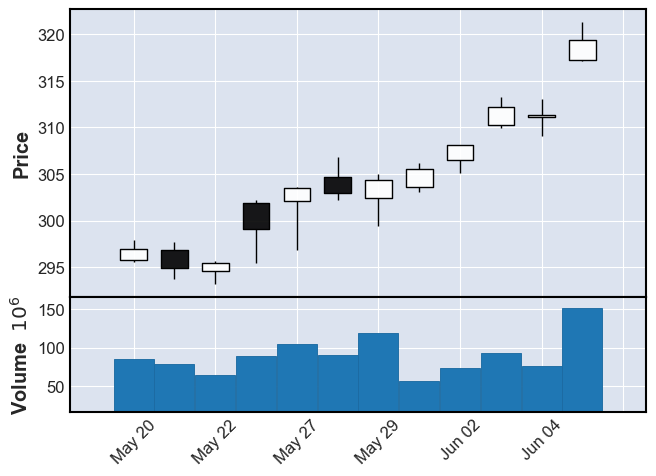

In [12]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
hammer_df = data.iloc[low_value:high_value]

hammer_df['Date'] = pd.to_datetime(hammer_df['Date'])  # Ensure the column is in datetime format
hammer_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(hammer_df, type='candle', volume=True)

## Inverse Hammer

In [13]:
# Detect an inverse hammer pattern
data['inverse_hammer'] = talib.CDLINVERTEDHAMMER(data['Open'], data['High'], data['Low'], data['Close'])
data
# # Get the dates where the inverse hammer pattern occurred
# inverse_hammer_dates = data[data['inverse_hammer'] == 100].index

data[data['inverse_hammer'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer
15,2014-09-23,198.43,199.2600,197.9500,198.01,111103600,0,0,100
74,2014-12-16,198.58,202.3950,197.8600,197.91,258867900,0,0,100
281,2015-10-13,200.65,202.1600,200.0500,200.25,87873100,0,0,100
695,2017-06-06,243.34,243.9800,243.1200,243.21,50250970,0,0,100
891,2018-03-16,274.50,275.3900,274.1400,274.20,99805450,0,0,100
894,2018-03-21,270.90,273.2700,270.1900,270.43,78515750,0,0,100
908,2018-04-11,263.47,265.6400,263.3900,263.76,91002710,0,0,100
1038,2018-10-15,275.55,277.0400,274.3000,274.40,101950500,0,0,100
1066,2018-11-23,263.18,264.8234,263.0700,263.25,42807880,0,0,100
1188,2019-05-22,285.45,286.6900,285.1000,285.63,49482470,0,0,100


In [14]:
# Get the index values
inverse_hammer_values = np.where(data['inverse_hammer'] == 100)[0].tolist()

len(inverse_hammer_values)

37

In [15]:
#### target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter amount to subtract from target index:  894
Enter amount to add to target index:  2


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\4027220945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverse_hammer_df['Date'] = pd.to_datetime(inverse_hammer_df['Date'])  # Ensure the column is in datetime format
C:\Users\jjel0\anaconda3\envs\trade_env\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ==============================================

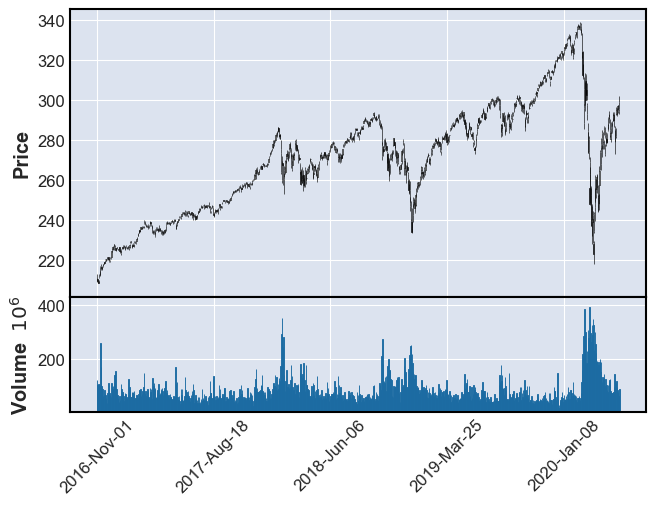

In [16]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
inverse_hammer_df = data.iloc[low_value:high_value]

inverse_hammer_df['Date'] = pd.to_datetime(inverse_hammer_df['Date'])  # Ensure the column is in datetime format
inverse_hammer_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(inverse_hammer_df, type='candle', volume=True)

## Piercing Pattern

In [17]:
# Detect a piercing pattern
data['piercing'] = talib.CDLPIERCING(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the piercing pattern occurred
piercing_dates = data[data['piercing'] == 100].index

data[data['piercing'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing
372,2016-02-24,190.63,193.53,189.320,193.20,150565000,0,0,0,100
451,2016-06-16,206.73,208.57,205.590,208.37,149194500,0,0,0,100
511,2016-09-12,212.39,216.81,212.310,216.34,167653400,0,0,0,100
830,2017-12-15,265.45,267.04,265.390,266.51,142356000,0,0,0,100
864,2018-02-06,259.94,269.70,258.700,269.13,353681700,0,0,0,100
938,2018-05-23,271.17,273.39,270.990,273.36,64605540,0,0,0,100
1227,2019-07-18,297.19,299.25,296.700,298.83,51701690,0,0,0,100
1295,2019-10-23,298.73,299.94,298.495,299.88,34991830,0,0,0,100
1362,2020-01-30,324.36,327.91,323.540,327.68,75491840,0,0,0,100
1435,2020-05-14,278.95,285.11,272.990,284.97,121977900,0,0,0,100


In [18]:
# Get the index values
piercing_index_values = np.where(data['piercing'] == 100)[0].tolist()

print(piercing_index_values)

[372, 451, 511, 830, 864, 938, 1227, 1295, 1362, 1435, 1456, 1476, 1503, 1652, 1884, 2281]


In [19]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1652
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\4150618594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piercing_df['Date'] = pd.to_datetime(piercing_df['Date'])  # Ensure the column is in datetime format


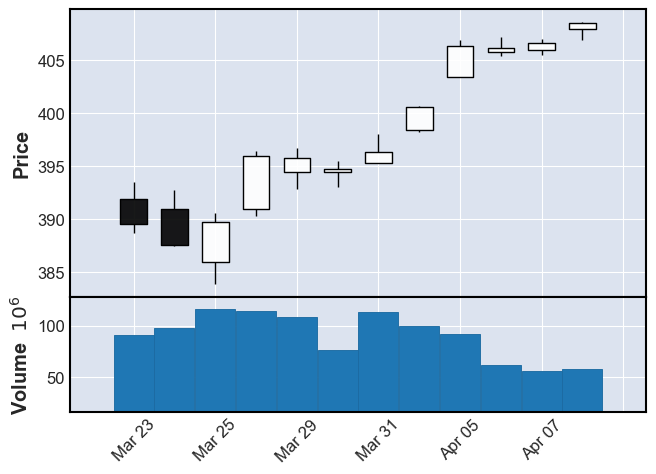

In [20]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
piercing_df = data.iloc[low_value:high_value]

piercing_df['Date'] = pd.to_datetime(piercing_df['Date'])  # Ensure the column is in datetime format
piercing_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(piercing_df, type='candle', volume=True)

## Morning Star

In [21]:
# Detect a morning star pattern
data['morning_star'] = talib.CDLMORNINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the morning star pattern occurred
morning_star_dates = data[data['morning_star'] == 100].index

data[data['morning_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star
16,2014-09-24,198.04,199.6900,197.5200,199.56,107098000,0,0,0,0,100
75,2014-12-17,198.44,202.3400,198.2900,201.79,252458700,0,0,0,0,100
194,2015-06-10,209.37,211.4100,209.2987,210.95,133678600,0,0,0,0,100
198,2015-06-16,208.93,210.3500,208.7200,210.25,85152890,0,0,0,0,100
227,2015-07-28,207.79,209.5000,206.8000,209.33,122370300,0,0,0,0,100
236,2015-08-10,209.28,210.6700,209.2800,210.57,79681690,0,0,0,0,100
419,2016-05-02,206.92,208.1800,206.4100,207.97,61966240,0,0,0,0,100
700,2017-06-13,243.98,244.6100,243.5799,244.55,59719680,0,0,0,0,100
925,2018-05-04,261.52,266.7892,261.1500,266.02,91154240,0,0,0,0,100
1175,2019-05-03,292.82,294.3400,291.2998,294.03,56543650,0,0,0,0,100


In [22]:
# Get the index values
morning_star_index_values = np.where(data['morning_star'] == 100)[0].tolist()

print(morning_star_index_values)

[16, 75, 194, 198, 227, 236, 419, 700, 925, 1175, 1399, 1649, 2111, 2184, 2252, 2397]


In [23]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1399
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\970771053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_star_df['Date'] = pd.to_datetime(morning_star_df['Date'])  # Ensure the column is in datetime format


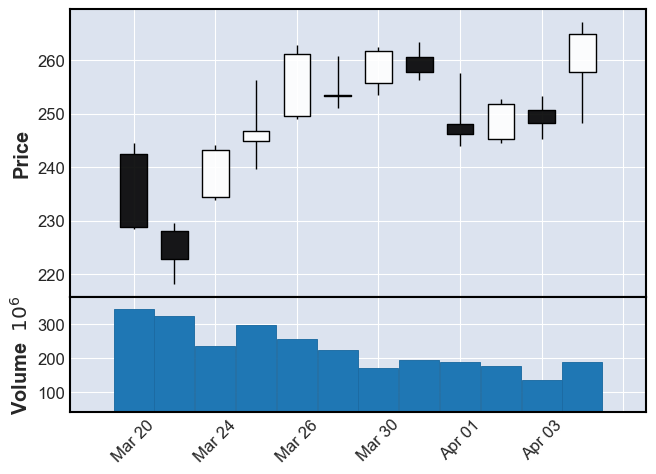

In [24]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
morning_star_df = data.iloc[low_value:high_value]

morning_star_df['Date'] = pd.to_datetime(morning_star_df['Date'])  # Ensure the column is in datetime format
morning_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(morning_star_df, type='candle', volume=True)

## Three Advancing White Soldiers

In [25]:
# Detect a three advancing white soldiers pattern
data['3adv_white_soldiers'] = talib.CDL3WHITESOLDIERS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the three advancing white soldiers pattern occurred
three_adv_white_soldiers_dates = data[data['3adv_white_soldiers'] == 100].index

data[data['3adv_white_soldiers'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers
1798,2021-10-21,451.77,453.8290,451.31,453.59,41305440,0,0,0,0,0,100
1900,2022-03-18,438.00,444.8600,437.22,444.52,106345500,0,0,0,0,0,100
2337,2023-12-13,464.49,470.7599,464.12,470.50,93277960,0,0,0,0,0,100
2507,2024-08-19,554.73,559.6100,553.86,559.61,39121790,0,0,0,0,0,100


In [26]:
# Get the index values
three_adv_white_soldiers_index_values = np.where(data['3adv_white_soldiers'] == 100)[0].tolist()

print(three_adv_white_soldiers_index_values)

[1798, 1900, 2337, 2507]


# target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\1690260306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_adv_white_soldiers_df['Date'] = pd.to_datetime(three_adv_white_soldiers_df['Date'])  # Ensure the column is in datetime format


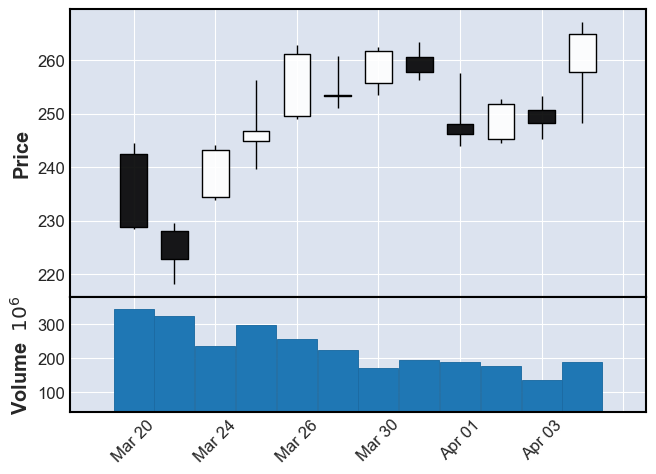

In [27]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
three_adv_white_soldiers_df = data.iloc[low_value:high_value]

three_adv_white_soldiers_df['Date'] = pd.to_datetime(three_adv_white_soldiers_df['Date'])  # Ensure the column is in datetime format
three_adv_white_soldiers_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(three_adv_white_soldiers_df, type='candle', volume=True)

## Hanging Man

In [28]:
# Detect a hanging man pattern
data['hanging_man'] = talib.CDLHANGINGMAN(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the hanging man pattern occurred
hanging_man_dates = data[data['hanging_man'] == 100].index

data[data['hanging_man'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man


In [29]:
# Get the index values
hanging_man_index_values = np.where(data['hanging_man'] == 100)[0].tolist()

print(hanging_man_index_values)

[]


In [30]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\2515793326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanging_man_df['Date'] = pd.to_datetime(hanging_man_df['Date'])  # Ensure the column is in datetime format


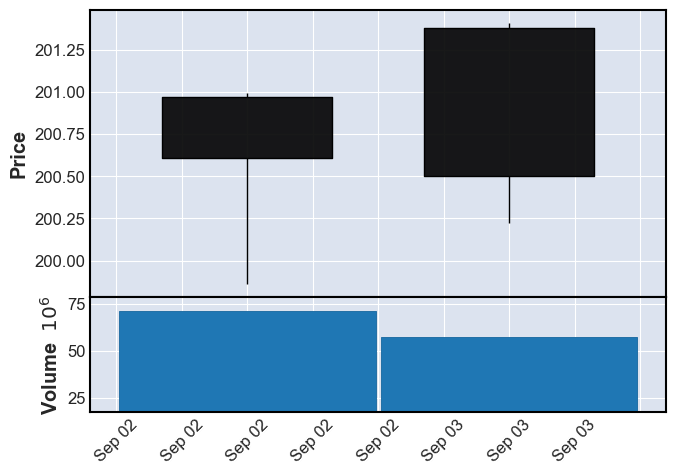

In [31]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
hanging_man_df = data.iloc[low_value:high_value]

hanging_man_df['Date'] = pd.to_datetime(hanging_man_df['Date'])  # Ensure the column is in datetime format
hanging_man_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(hanging_man_df, type='candle', volume=True)

## Shooting Star

In [32]:
# Detect a shooting star pattern
data['shooting_star'] = talib.CDLSHOOTINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the shooting star pattern occurred
shooting_star_dates = data[data['shooting_star'] == 100].index

data[data['shooting_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star


In [33]:
# Get the index values
shooting_star_index_values = np.where(data['shooting_star'] == 100)[0].tolist()

print(shooting_star_index_values)

[]


In [34]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\4011686296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_star_df['Date'] = pd.to_datetime(shooting_star_df['Date'])  # Ensure the column is in datetime format


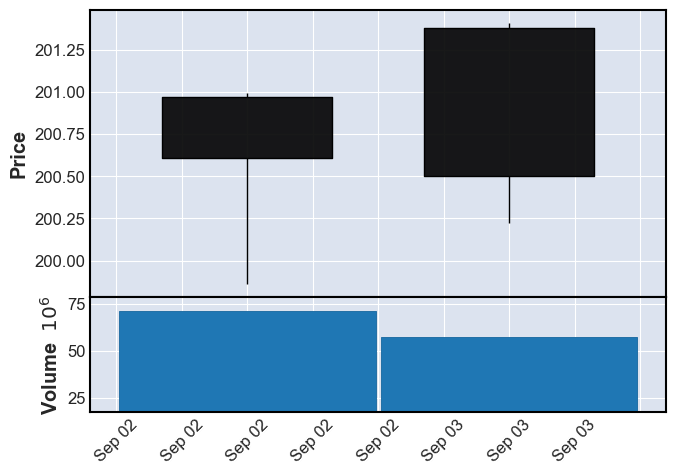

In [35]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
shooting_star_df = data.iloc[low_value:high_value]

shooting_star_df['Date'] = pd.to_datetime(shooting_star_df['Date'])  # Ensure the column is in datetime format
shooting_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(shooting_star_df, type='candle', volume=True)

## Evening Star

In [36]:
# Detect an evening star pattern
data['evening_star'] = talib.CDLEVENINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the evening star pattern occurred
evening_star_dates = data[data['evening_star'] == 100].index

data[data['evening_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star


In [37]:
# Get the index values
evening_star_index_values = np.where(data['evening_star'] == 100)[0].tolist()

print(evening_star_index_values)

[]


In [38]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\1820039369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_star_df['Date'] = pd.to_datetime(evening_star_df['Date'])  # Ensure the column is in datetime format


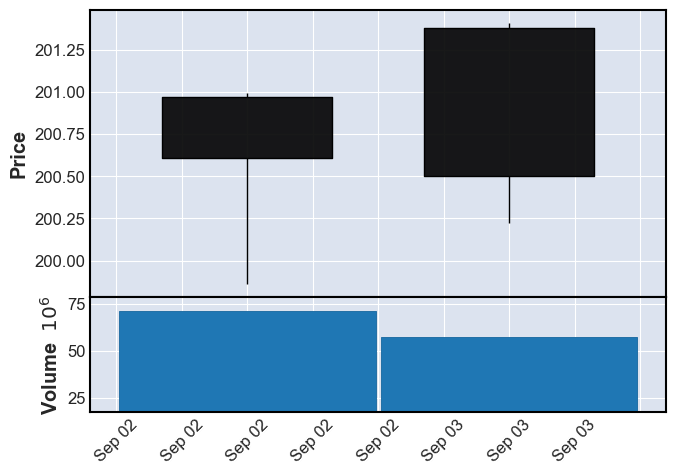

In [39]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
evening_star_df = data.iloc[low_value:high_value]

evening_star_df['Date'] = pd.to_datetime(evening_star_df['Date'])  # Ensure the column is in datetime format
evening_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(evening_star_df, type='candle', volume=True)

## Evening Doji Star

In [40]:
# Detect an evening doji star pattern
data['evening_doji_star'] = talib.CDLEVENINGDOJISTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the evening doji star pattern occurred
evening_doji_star_dates = data[data['evening_doji_star'] == 100].index

data[data['evening_doji_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star


In [41]:
# Get the index values
evening_doji_star_index_values = np.where(data['evening_doji_star'] == 100)[0].tolist()

print(evening_doji_star_index_values)

[]


In [42]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\3396305443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_doji_star_df['Date'] = pd.to_datetime(evening_doji_star_df['Date'])  # Ensure the column is in datetime format


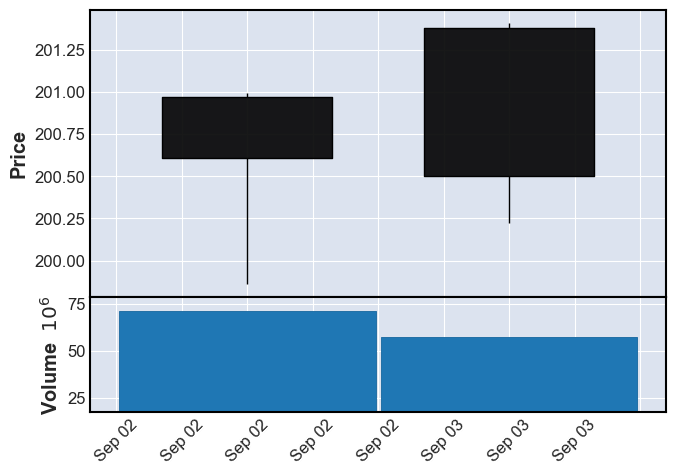

In [43]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
evening_doji_star_df = data.iloc[low_value:high_value]

evening_doji_star_df['Date'] = pd.to_datetime(evening_doji_star_df['Date'])  # Ensure the column is in datetime format
evening_doji_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(evening_doji_star_df, type='candle', volume=True)

## Three Black Crows

In [44]:
# Detect a three black crows pattern
data['three_black_crows'] = talib.CDL3BLACKCROWS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the three black crows pattern occurred
three_black_crows_dates = data[data['three_black_crows'] == 100].index

data[data['three_black_crows'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows


In [45]:
# Get the index values
three_black_crows_index_values = np.where(data['three_black_crows'] == 100)[0].tolist()

print(three_black_crows_index_values)

[]


In [46]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\1152123449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_black_crows_df['Date'] = pd.to_datetime(three_black_crows_df['Date'])  # Ensure the column is in datetime format


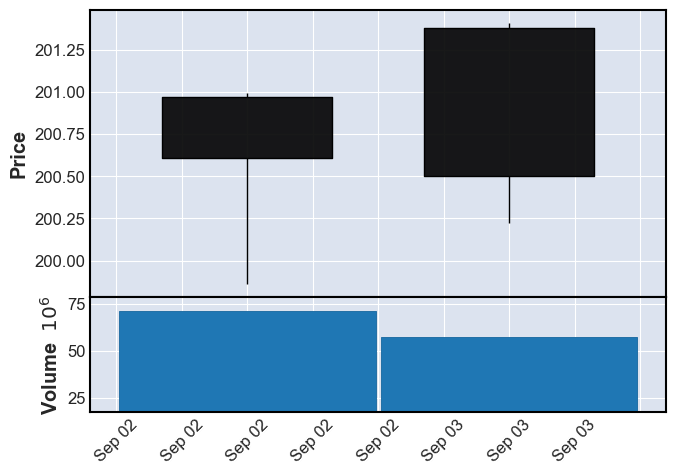

In [47]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
three_black_crows_df = data.iloc[low_value:high_value]

three_black_crows_df['Date'] = pd.to_datetime(three_black_crows_df['Date'])  # Ensure the column is in datetime format
three_black_crows_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(three_black_crows_df, type='candle', volume=True)

## Dark Cloud Cover

In [48]:
# Detect a dark cloud cover pattern
data['dark_cloud_cover'] = talib.CDLDARKCLOUDCOVER(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the dark cloud cover pattern occurred
dark_cloud_cover_dates = data[data['dark_cloud_cover'] == 100].index

data[data['dark_cloud_cover'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover


In [49]:
# Get the index values
dark_cloud_cover_index_values = np.where(data['dark_cloud_cover'] == 100)[0].tolist()

print(dark_cloud_cover_index_values)

[]


In [50]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\2387346891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark_cloud_cover_df['Date'] = pd.to_datetime(dark_cloud_cover_df['Date'])  # Ensure the column is in datetime format


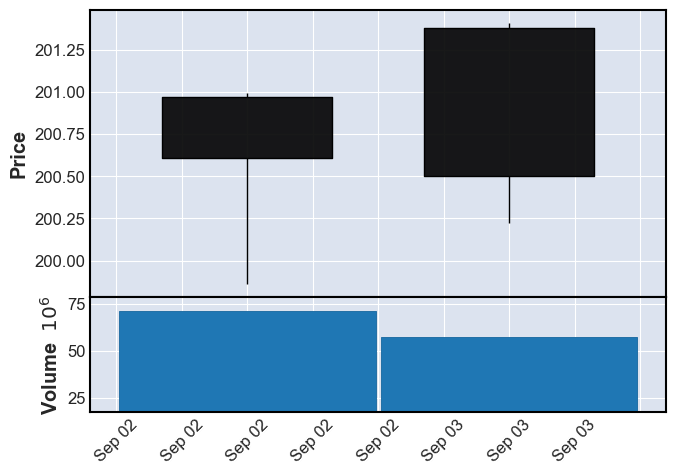

In [51]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
dark_cloud_cover_df = data.iloc[low_value:high_value]

dark_cloud_cover_df['Date'] = pd.to_datetime(dark_cloud_cover_df['Date'])  # Ensure the column is in datetime format
dark_cloud_cover_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(dark_cloud_cover_df, type='candle', volume=True)

## Doji

In [52]:
# Detect a doji pattern
data['doji'] = talib.CDLDOJI(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the doji pattern occurred
doji_dates = data[data['doji'] == 100].index.tolist()

data[data['doji'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji
11,2014-09-17,200.77,201.6800,199.750,200.75,149647200,0,0,0,0,0,0,0,0,0,0,0,0,100
33,2014-10-17,188.42,189.7500,187.620,188.47,214147600,0,0,0,0,0,0,0,0,0,0,0,0,100
37,2014-10-23,194.62,196.2000,194.260,194.93,153664900,0,0,0,0,0,0,0,0,0,0,0,0,100
43,2014-10-31,201.78,201.8200,200.770,201.66,146697400,0,0,0,0,0,0,-100,0,0,0,0,0,100
44,2014-11-03,201.92,202.4500,201.305,201.77,93478670,0,0,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2024-07-01,545.63,545.8800,542.520,545.34,40297810,0,0,0,0,0,0,0,0,0,0,0,0,100
2477,2024-07-08,555.44,556.2501,554.190,555.28,36110450,0,0,0,0,0,0,0,0,0,0,0,0,100
2502,2024-08-12,534.21,535.7300,530.950,533.27,42542070,0,0,0,0,0,0,0,0,0,0,0,0,100
2504,2024-08-14,542.85,544.9600,540.120,543.75,42446930,0,0,0,0,0,0,0,0,0,0,0,0,100


In [53]:
# Get the index values
doji_index_values = np.where(data['doji'] == 100)[0].tolist()

print(doji_index_values)

[11, 33, 37, 43, 44, 45, 50, 52, 56, 59, 77, 80, 81, 101, 107, 110, 121, 162, 168, 177, 182, 185, 189, 193, 195, 199, 202, 203, 215, 218, 220, 221, 239, 251, 255, 264, 265, 266, 271, 273, 279, 280, 308, 309, 312, 313, 329, 332, 338, 343, 358, 382, 389, 407, 410, 411, 415, 421, 432, 437, 442, 449, 454, 467, 485, 488, 505, 506, 509, 513, 515, 519, 526, 531, 533, 539, 541, 562, 569, 594, 596, 598, 601, 605, 612, 644, 650, 655, 656, 657, 661, 665, 667, 670, 671, 673, 675, 678, 686, 694, 696, 697, 703, 707, 715, 719, 723, 728, 735, 742, 757, 759, 761, 768, 769, 783, 785, 787, 793, 798, 815, 831, 835, 837, 838, 873, 883, 891, 893, 904, 906, 908, 911, 913, 926, 934, 939, 940, 946, 950, 951, 961, 978, 982, 990, 991, 999, 1000, 1009, 1015, 1029, 1034, 1040, 1050, 1056, 1066, 1070, 1090, 1095, 1096, 1101, 1107, 1112, 1115, 1120, 1131, 1140, 1147, 1148, 1151, 1153, 1165, 1169, 1178, 1186, 1188, 1193, 1202, 1203, 1204, 1205, 1208, 1209, 1213, 1219, 1222, 1247, 1249, 1251, 1259, 1262, 1266, 1287, 1

In [54]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1096
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\318927622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doji_df['Date'] = pd.to_datetime(doji_df['Date'])  # Ensure the column is in datetime format


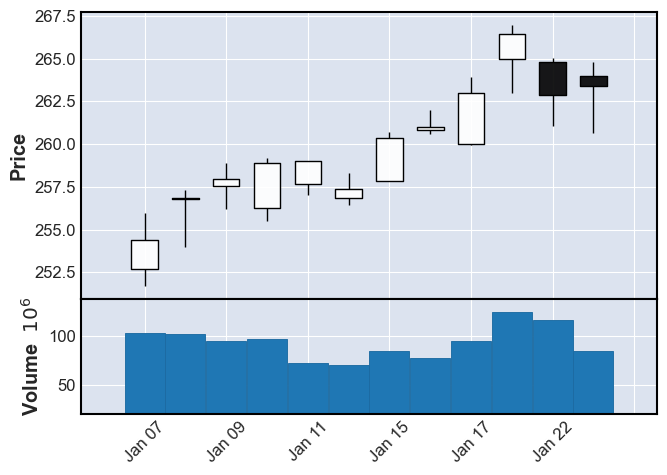

In [55]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
doji_df = data.iloc[low_value:high_value]

doji_df['Date'] = pd.to_datetime(doji_df['Date'])  # Ensure the column is in datetime format
doji_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(doji_df, type='candle', volume=True)

## Spinning Top

In [56]:
# Detect a spinning top pattern
data['spinning_top'] = talib.CDLSPINNINGTOP(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the spinning top pattern occurred
spinning_top_dates = data[data['spinning_top'] == 100].index

# Get the index values
spinning_top_values = np.where(data['spinning_top'] == 100)[0].tolist()

data[data['spinning_top'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji,spinning_top
22,2014-10-02,194.180,195.0550,192.350,194.380,157161800,0,0,0,0,0,0,0,0,0,0,0,0,0,100
33,2014-10-17,188.420,189.7500,187.620,188.470,214147600,0,0,0,0,0,0,0,0,0,0,0,0,100,100
37,2014-10-23,194.620,196.2000,194.260,194.930,153664900,0,0,0,0,0,0,0,0,0,0,0,0,100,100
48,2014-11-07,203.170,203.5999,202.610,203.340,89443040,0,0,0,0,0,0,0,0,0,0,0,0,0,100
50,2014-11-11,204.055,204.3100,203.650,204.175,54294510,0,0,0,0,0,0,-100,0,0,0,0,0,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2024-05-03,511.160,512.5500,508.560,511.290,72756710,0,0,0,0,0,0,0,0,0,0,0,0,100,100
2458,2024-06-07,533.660,536.8900,532.535,534.010,43224530,0,0,0,0,0,0,0,0,0,0,0,0,100,100
2467,2024-06-21,544.400,545.6500,543.020,544.510,64513860,0,0,0,0,0,0,0,0,0,0,0,0,100,100
2504,2024-08-14,542.850,544.9600,540.120,543.750,42446930,0,0,0,0,0,0,0,0,0,0,0,0,100,100


In [57]:
# Get the index values
spinning_top_index_values = np.where(data['spinning_top'] == 100)[0].tolist()

print(spinning_top_index_values)

[22, 33, 37, 48, 50, 52, 53, 59, 66, 67, 77, 107, 112, 135, 142, 150, 165, 168, 174, 177, 188, 193, 195, 199, 215, 265, 266, 273, 280, 286, 289, 313, 320, 325, 339, 348, 349, 364, 379, 382, 385, 389, 410, 411, 421, 431, 432, 442, 449, 454, 467, 478, 485, 488, 491, 505, 508, 519, 531, 533, 538, 539, 562, 569, 589, 591, 596, 601, 612, 631, 634, 644, 654, 655, 661, 670, 672, 678, 686, 690, 694, 696, 697, 708, 715, 719, 723, 728, 742, 748, 759, 761, 767, 774, 781, 783, 787, 812, 815, 827, 831, 836, 842, 845, 867, 868, 893, 904, 907, 911, 924, 926, 934, 936, 940, 946, 950, 991, 999, 1000, 1001, 1008, 1015, 1026, 1029, 1034, 1040, 1056, 1066, 1070, 1076, 1096, 1101, 1106, 1107, 1121, 1128, 1147, 1148, 1150, 1151, 1161, 1178, 1188, 1203, 1204, 1207, 1213, 1214, 1221, 1229, 1249, 1259, 1266, 1268, 1285, 1287, 1288, 1290, 1305, 1309, 1331, 1332, 1336, 1367, 1373, 1374, 1395, 1396, 1400, 1402, 1411, 1414, 1419, 1449, 1452, 1490, 1498, 1499, 1501, 1519, 1554, 1558, 1560, 1561, 1565, 1569, 1574, 1

In [58]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1121
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\3467033171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spinning_top_df['Date'] = pd.to_datetime(spinning_top_df['Date'])  # Ensure the column is in datetime format


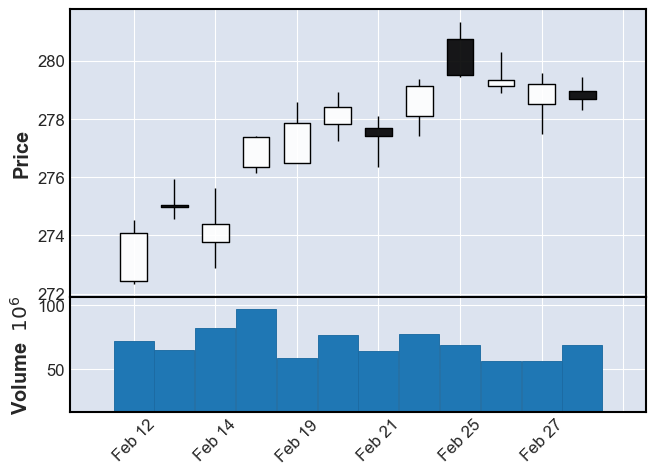

In [59]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
spinning_top_df = data.iloc[low_value:high_value]

spinning_top_df['Date'] = pd.to_datetime(spinning_top_df['Date'])  # Ensure the column is in datetime format
spinning_top_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(spinning_top_df, type='candle', volume=True)

## Rising/Falling Three Methods

In [60]:
# Detect a rising falling three methods pattern
data['rising_falling_three_methods'] = talib.CDLRISEFALL3METHODS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the rising falling three methods pattern occurred
rising_falling_three_methods_dates = data[data['rising_falling_three_methods'] == 100].index

data[data['rising_falling_three_methods'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,...,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji,spinning_top,rising_falling_three_methods


In [61]:
# Get the index values
rising_falling_three_methods_index_values = np.where(data['rising_falling_three_methods'] == 100)[0].tolist()

print(rising_falling_three_methods_index_values)

[]


In [62]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_34316\3425068432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rising_falling_three_methods_df['Date'] = pd.to_datetime(rising_falling_three_methods_df['Date'])  # Ensure the column is in datetime format


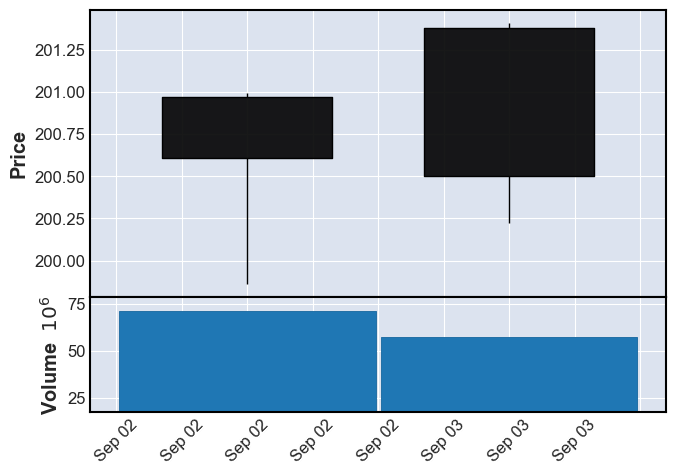

In [63]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
rising_falling_three_methods_df = data.iloc[low_value:high_value]

rising_falling_three_methods_df['Date'] = pd.to_datetime(rising_falling_three_methods_df['Date'])  # Ensure the column is in datetime format
rising_falling_three_methods_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(rising_falling_three_methods_df, type='candle', volume=True)

## Plotting

In [64]:
data['Date'] = pd.to_datetime(data['Date'])  # Ensure the column is in datetime format
data.set_index('Date', inplace=True)       # Set the column as the DataFrame index

In [65]:
# Filter the last 100 rows
last_100_rows = data.tail(100)

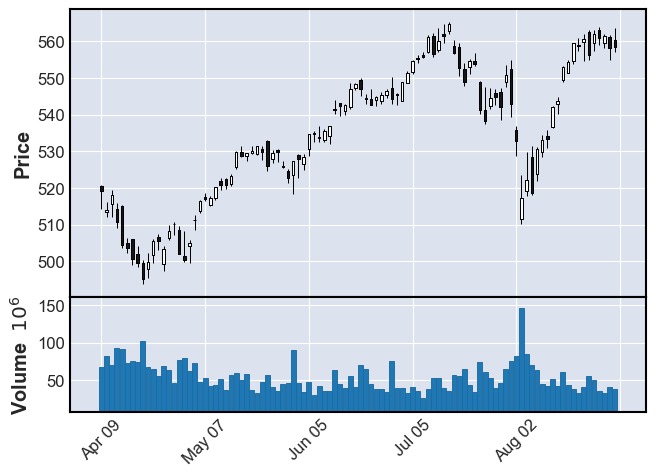

In [66]:
# Create a candlestick chart
mpf.plot(last_100_rows, type='candle', volume=True)

In [67]:
# Filter the last 10 rows
last_10_rows = data.tail(10)

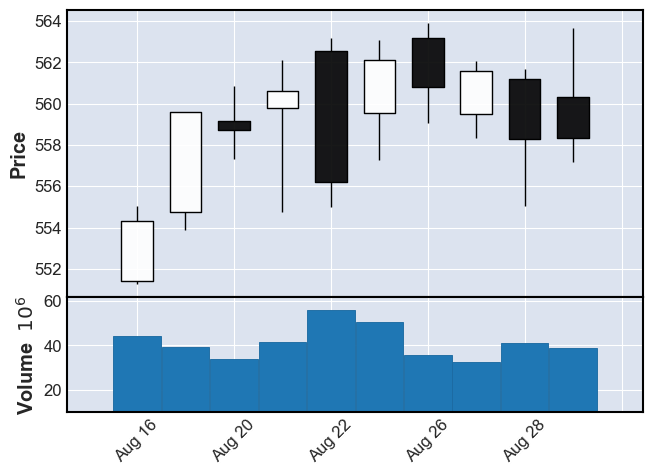

In [68]:
# Create a candlestick chart
mpf.plot(last_10_rows, type='candle', volume=True)